In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy.special import erf
from matplotlib.patches import Ellipse
from scipy.stats import gaussian_kde

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [34]:
# Data generated using https://github.com/tcallister/get-lvk-data
sampleDict = np.load('./../../get-lvk-data/sampleDict_FAR_1_in_1_yr.pickle',allow_pickle=True)
sampleDict.pop('GW170817')
sampleDict.pop('S190412m')
sampleDict.keys()

dict_keys(['GW150914', 'GW151012', 'GW151226', 'GW170104', 'GW170608', 'GW170729', 'GW170809', 'GW170814', 'GW170818', 'GW170823', 'S190408an', 'S190413ac', 'S190413i', 'S190421ar', 'S190425z', 'S190426c', 'S190503bf', 'S190512at', 'S190513bm', 'S190517h', 'S190519bj', 'S190521g', 'S190521r', 'S190527w', 'S190602aq', 'S190620e', 'S190630ag', 'S190701ah', 'S190706ai', 'S190707q', 'S190708ap', 'S190719an', 'S190720a', 'S190725t', 'S190727h', 'S190728q', 'S190731aa', 'S190803e', 'S190805bq', 'S190814bv', 'S190828j', 'S190828l', 'S190910s', 'S190915ak', 'S190917u', 'S190924h', 'S190925ad', 'S190929d', 'S190930s', 'S191103a', 'S191105e', 'S191109d', 'S191127p', 'S191129u', 'S191204r', 'S191215w', 'S191216ap', 'S191222n', 'S191230an', 'S200105ae', 'S200112r', 'S200115j', 'S200128d', 'S200129m', 'S200202ac', 'S200208q', 'S200209ab', 'S200216br', 'S200219ac', 'S200224ca', 'S200225q', 'S200302c', 'S200311bg', 'S200316bj'])

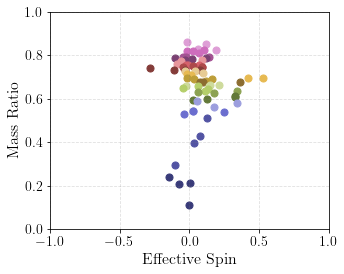

In [45]:
fig,ax = plt.subplots(figsize=(5,4))

colormap = plt.get_cmap('tab20b')
ax.set_prop_cycle('color',plt.cm.tab20b(np.linspace(0,1,len(sampleDict))[::-1]))

q = np.array([np.median(sampleDict[key]['m2']/sampleDict[key]['m1']) for key in sampleDict.keys()])
chi = np.array([np.median(sampleDict[key]['Xeff']) for key in sampleDict.keys()])

sorting = np.argsort(q)[::-1]
q = q[sorting]
chi = chi[sorting]

for i in range(q.size):
    ax.scatter(chi[i],q[i],s=50)
        
ax.set_xlabel(r'Effective Spin',fontsize=16)
ax.set_ylabel(r'Mass Ratio',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)
ax.xaxis.grid(True,which='major',ls='--',color='grey',alpha=0.25)
ax.yaxis.grid(True,which='major',ls='--',color='grey',alpha=0.25)

plt.savefig('q_v_chi-effective-pollock-plot.png',bbox_inches='tight',dpi=200)

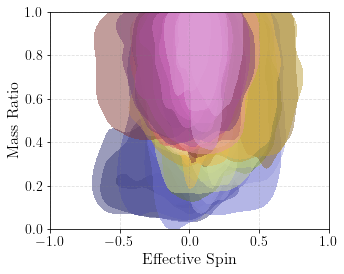

In [46]:
fig,ax = plt.subplots(figsize=(5,4))

colormap = plt.get_cmap('tab20b')
colors = plt.cm.tab20b(np.linspace(0,1,len(sampleDict))[::-1]) #[shuffle]
                            
qs = np.array([np.random.choice(sampleDict[key]['m2']/sampleDict[key]['m1'],size=1000,replace=True) for key in sampleDict.keys()])
chis = np.array([np.random.choice(sampleDict[key]['Xeff'],size=1000,replace=True) for key in sampleDict.keys()])

sorting = np.argsort(np.median(qs,axis=1))[::-1]
chis = chis[sorting,:]
qs = qs[sorting,:]

q_grid = np.linspace(0,1,100)
chi_grid = np.linspace(-1,1,99)
X,Q = np.meshgrid(chi_grid,q_grid)

for i in range(qs.shape[0])[::-1]:
    
    kde = gaussian_kde([chis[i,:],qs[i,:]])
    p = kde([X.reshape(-1),Q.reshape(-1)])
    
    sorted_p = np.sort(p)[::-1]
    cdf = np.cumsum(sorted_p)/np.sum(sorted_p)
    c90 = np.interp(0.90,cdf,sorted_p)
    
    ax.contourf(chi_grid,q_grid,p.reshape(X.shape),levels=(c90,1000),colors=[colors[i],],alpha=0.5)
            
ax.set_xlabel(r'Effective Spin',fontsize=16)
ax.set_ylabel(r'Mass Ratio',fontsize=16)
ax.tick_params(axis='both', labelsize=14)
ax.set_xlim(-1,1)
ax.set_ylim(0,1)
ax.xaxis.grid(True,which='major',ls='--',color='grey',alpha=0.25)
ax.yaxis.grid(True,which='major',ls='--',color='grey',alpha=0.25)

plt.savefig('q_v_chi-effective-pollock-plot-with-errors.png',bbox_inches='tight',dpi=200)